In [1]:
import tensorflow as tf
import datetime

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

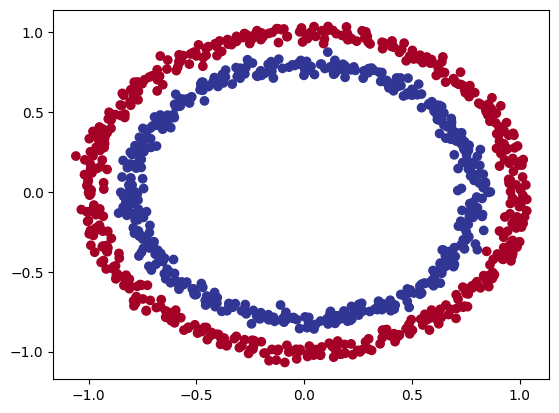

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [10]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.4649 - loss: 6.5342 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4573 - loss: 5.4593
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.4741 - loss: 4.2486
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.4680 - loss: 0.7351
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.4762 - loss: 0.7113


In [11]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Model 2

In [12]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.4955 - loss: 0.6931


[0.693276584148407, 0.5]

model3

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.5017 - loss: 0.6924


[0.6939377188682556, 0.4869999885559082]

Creates a meshgrid of the different X values.

In [24]:
import numpy as np
def plot_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
    
    x_in=np.c_[xx.ravel(),yy.ravel()]
    y_pred=model.predict(x_in)
    if model.output_shape[-1]>1:
        print('doing multiclass classification...')
    else:
        print('doing binary classification')
        y_pred=np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
doing binary classification


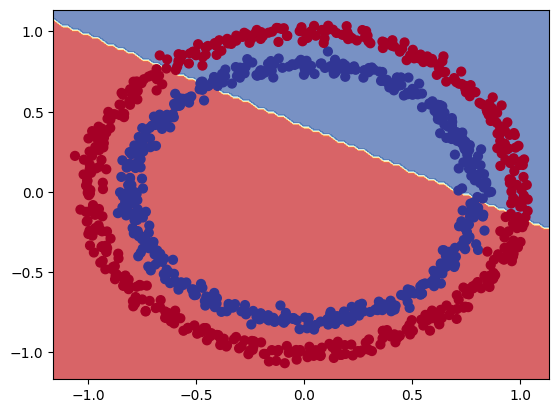

In [25]:
plot_decision_boundary(model_3,X,y)

Model 4 Nonlinear

In [26]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.4560 - loss: 4.0052 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4772 - loss: 3.5393
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.4785 - loss: 3.4427
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.4834 - loss: 3.1877
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.4831 - loss: 3.0188
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.4847 - loss: 2.7206
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.4867 - loss: 2.1028
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.4609 - loss: 1.4785
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.4748 - loss: 0.9345
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.4690 - loss: 0.8789
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.4652 - loss: 0.8590
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [27]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7884 - loss: 0.5836


[0.5879758596420288, 0.7749999761581421]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
doing binary classification


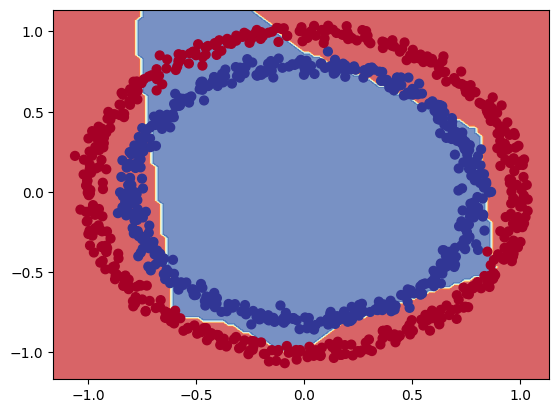

In [28]:
plot_decision_boundary(model_4,X,y)

model 5

In [30]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history1=model_5.fit(X,y,epochs=100,verbose=0)

In [32]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8648 - loss: 0.4250


[0.4224413335323334, 0.8629999756813049]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
doing binary classification


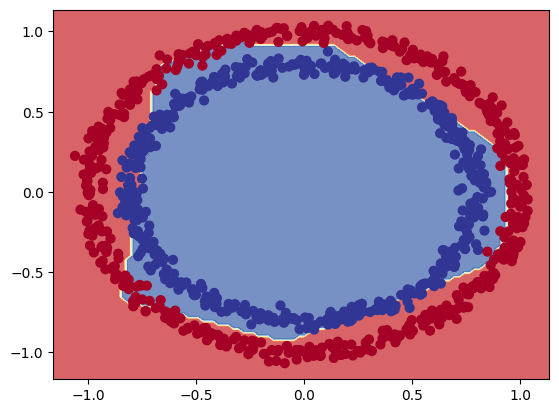

In [33]:
plot_decision_boundary(model_5,X,y)

Evaluating and improving our classification model

In [34]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape,X_test.shape

((800, 2), (200, 2))

In [35]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
history=model_6.fit(X_train,y_train,epochs=25)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4861 - loss: 0.6977   
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5056 - loss: 0.6883
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5283 - loss: 0.6830
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.5522 - loss: 0.6753
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5851 - loss: 0.6635
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6713 - loss: 0.6303
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8512 - loss: 0.5792
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8933 - loss: 0.5041
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9540 - loss: 0.4208
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9673 - loss: 0.3406
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9654 - loss: 0.2754
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/ste

In [36]:
loss,accuracy=model_6.evaluate(X_test,y_test)
print(f'Model loss on the test set:{loss}')
print(f'Model accuracy on the test set:{accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9873 - loss: 0.0514
Model loss on the test set:0.054183147847652435
Model accuracy on the test set:0.9900000095367432


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
doing binary classification


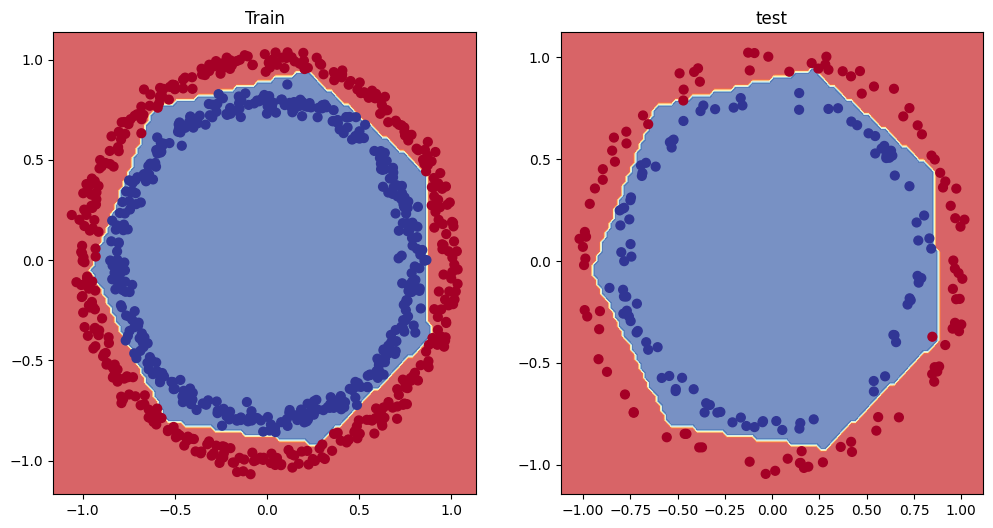

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_6,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_6,X_test,y_test)
plt.show()

In [39]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.51875,0.693043
1,0.53000,0.685737
2,0.56500,0.679228
3,0.58875,0.670279
4,0.62125,0.655583
5,0.76625,0.618983
6,0.89875,0.561098
7,0.91500,0.482425
8,0.95625,0.399426
9,0.96750,0.323736


Text(0.5, 1.0, 'Model_6 training curves')

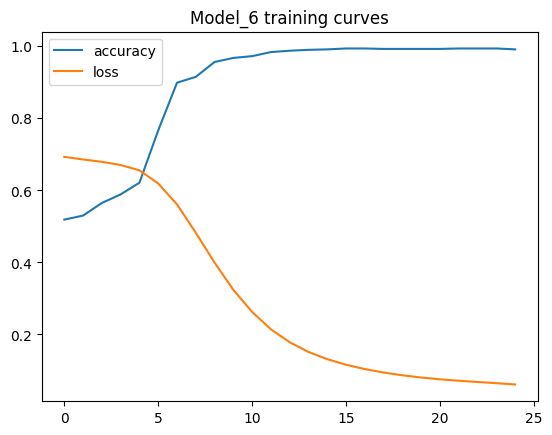

In [40]:
pd.DataFrame(history.history).plot()
plt.title('Model_6 training curves')

Find the best learning rate

In [42]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history=model_7.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.4836 - loss: 0.7309 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.4781 - loss: 0.7299 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.4786 - loss: 0.7288 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4781 - loss: 0.7276 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.4761 - loss: 0.7264 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.4817 - loss: 0.7251 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4873 - loss: 0.7237 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4845 - loss: 0.7223 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.4841 - loss: 

<Axes: xlabel='epochs'>

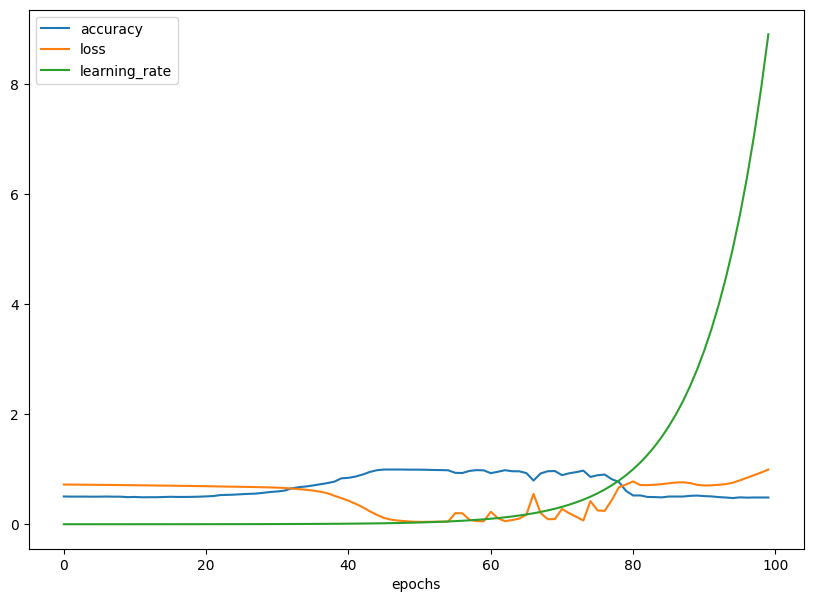

In [43]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs. loss')

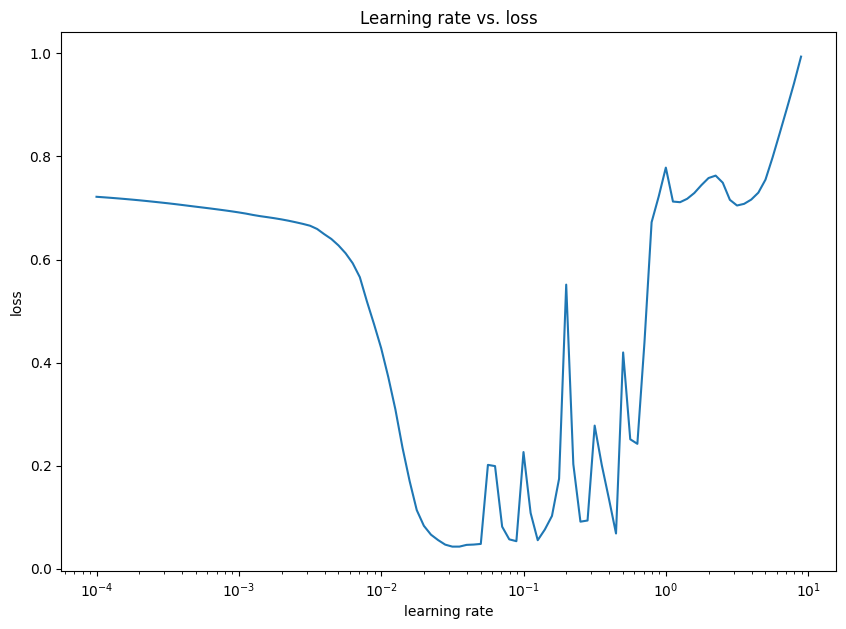

In [44]:
lrs=1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning rate vs. loss')

In [48]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])
history=model_8.fit(X_train,y_train,epochs=25)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.4857 - loss: 0.6919 
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5543 - loss: 0.6814
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.6207 - loss: 0.6614
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.6681 - loss: 0.6152
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.7728 - loss: 0.5346
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8465 - loss: 0.4229
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9509 - loss: 0.2903
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9875 - loss: 0.1979
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9945 - loss: 0.1456
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9962 - loss: 0.1141
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9974 - loss: 0.0981
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/ste

In [49]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9796 - loss: 0.0644


[0.055538855493068695, 0.9800000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
doing binary classification


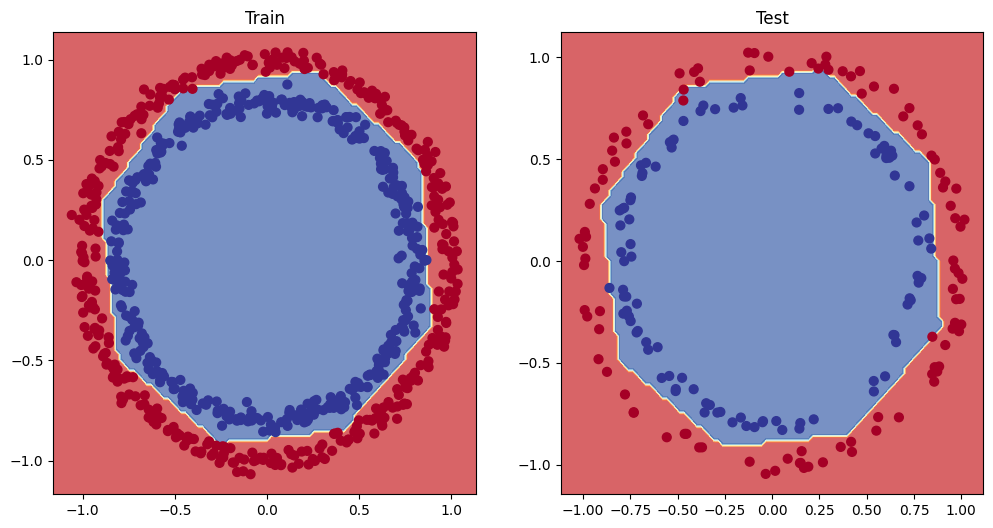

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [51]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9796 - loss: 0.0644
Model loss on test set: 0.055538855493068695
Model accuracy on test set: 98.00%
